In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns
from sklearn import neighbors
from sklearn import ensemble

In [31]:
''' This study investigates potential associations of screen time and outdoor play (as a 
proxy for physical activity) with social skills. Cross sectional data were available for 
575 mothers with a child (54% boys) aged 2–5 years. Mothers reported their child’s screen 
time, outdoor play time and social skills'''
#https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0193700
#https://dro.deakin.edu.au/view/DU:30106962
df = pd.read_csv('stdataset.csv')
df.columns = ["ID", 'gender', 'age', 'disability', 'mothersEdu', 'allSocialSkills', 'express', 'comply', 'disrupt',
              'meetStReqs', 'meetPhysReqs', 'screenTime', 'tvTime', 'cpuTime', 'outdoorTime']
df.disability = np.where(df.disability == 'Yes', 1, 0)
df.head()

,ID,gender,age,disability,mothersEdu,allSocialSkills,express,comply,disrupt,meetStReqs,meetPhysReqs,screenTime,tvTime,cpuTime,outdoorTime
0,30208,Female,3.030801,0,3,78,38,24,12,0,0,3.000000,2.000000,1.0,1.500000
1,30400,Female,3.865845,0,3,82,39,27,10,1,1,0.000000,0.000000,0.0,4.000000
2,30863,Female,2.130048,0,3,68,35,18,11,1,0,0.857143,0.857143,0.0,1.714286
3,30530,Male,2.105407,0,3,63,29,20,12,1,0,0.500000,0.500000,0.0,1.500000
4,300057,Female,2.403833,0,3,78,38,25,11,1,0,0.357143,0.357143,0.0,1.500000


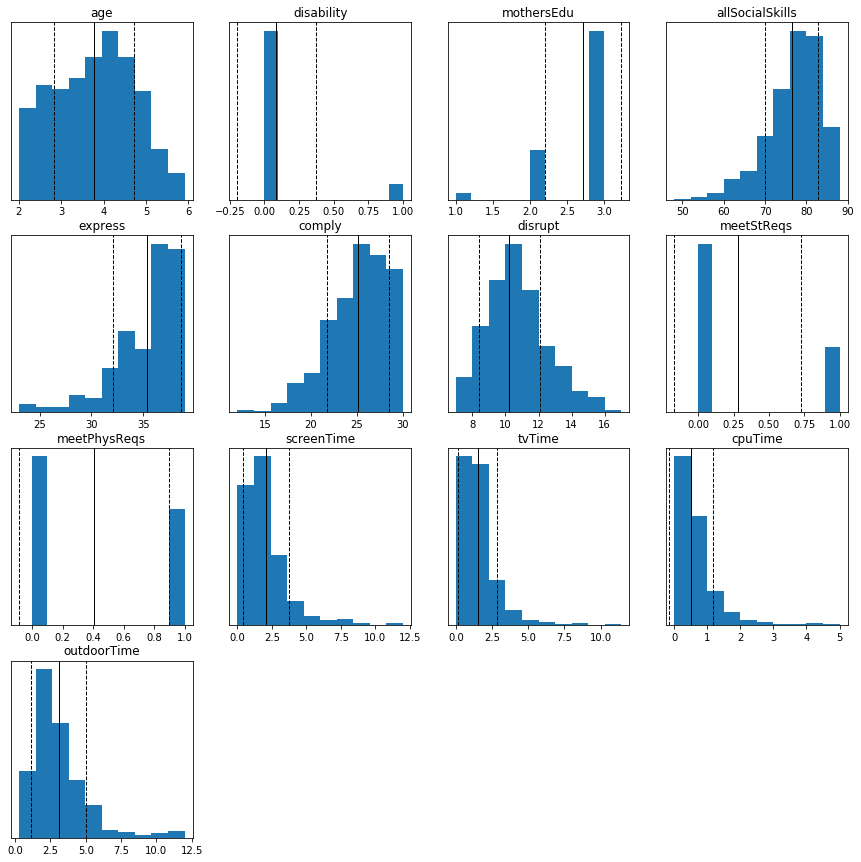

In [36]:
plt.figure(figsize=[15,15])
for j,x in enumerate(df.columns[2:]):
    plt.subplot(4,4,j+1)
    plt.hist(df[x])
    plt.axvline(df[x].mean(), color='k', linestyle='solid', linewidth=1)
    plt.axvline(df[x].mean() - df[x].std(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(df[x].mean() + df[x].std(), color='k', linestyle='dashed', linewidth=1)
    plt.yticks([])
    plt.title(x)
plt.show()

In [38]:
df.corr()['allSocialSkills']


ID                -0.043333
age                0.233644
disability        -0.166169
mothersEdu         0.007182
allSocialSkills    1.000000
express            0.810584
comply             0.878970
disrupt           -0.478303
meetStReqs         0.043760
meetPhysReqs       0.064205
screenTime        -0.071117
tvTime            -0.068313
cpuTime           -0.043249
outdoorTime        0.101425
Name: allSocialSkills, dtype: float64

In [45]:
regr = linear_model.LinearRegression()
x = df[['disability', 'mothersEdu', 'meetStReqs', 'meetPhysReqs',
       'tvTime', 'cpuTime', 'outdoorTime']]
y = df.allSocialSkills
regr.fit(x,y)
scores = cross_val_score(regr,x,y,cv=10)
print("Fold Scores: ",scores)
print("\nAverage Score: ",np.mean(scores))

Fold Scores:  [-0.05984697 -0.09256542 -0.17409548  0.05815252  0.01419537  0.03506995
  0.0202157   0.03656074  0.01346419  0.00169162]

Average Score:  -0.014715778395036395


In [47]:
#statsmodels
linear_formula = 'allSocialSkills ~ disability+mothersEdu+meetStReqs+meetPhysReqs+tvTime+cpuTime+outdoorTime'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        allSocialSkills   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     4.303
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           0.000118
Time:                        22:35:33   Log-Likelihood:                -1869.5
No. Observations:                 575   AIC:                             3755.
Df Residuals:                     567   BIC:                             3790.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       76.8111      1.639     46.878      0.000      73.593      80.029
disability      -3.8076      0.939     -4.054      0.000      -5.652      -1.963
mothersEdu      -0.1139      0.522     -0.218      0.827      -1.140       0.912
meetStReqs      -0.5972      0.709     -0.842      0.400      -1.990       0.796
meetPhysReqs    -0.3971      0.773     -0.514      0.608      -1.915       1.121
tvTime          -0.5394      0.242     -2.229      0.026      -1.015      -0.064
cpuTime         -0.4589      0.434     -1.058      0.291      -1.311       0.393
outdoorTime      0.5468      0.206      2.655      0.008       0.142       0.951
==============================================================================
Omnibus:                       46.082   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.996
Skew:                          -0.733   Prob(JB):                     1.14e-12
Kurtosis:                       3.379   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Let's check how our output looks:
pred = cross_val_predict(regr,x,y,cv=3)
residual = y - pred

plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('Multicollinearity')
sns.heatmap(x.corr(), vmin = -1,square=True, cmap="PiYG")
plt.subplot(132)
plt.hist(residual, bins=25)
plt.title('Residual Histogram - should look normal')
plt.ylabel('Count')
plt.subplot(133)
plt.scatter(pred, residual, alpha=.2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Scedasticity - should be consistent')
plt.show()